In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat

### Import the dataset

In [2]:
df= pd.read_csv('../assets/df.csv')

In [3]:
df.drop(columns= ['Date.1'], inplace= True)

In [4]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)

In [5]:
df.PromoInterval.fillna('N/A', inplace= True)

In [6]:
df['Promo2BeginMonth'].fillna('N/A', inplace= True)

In [7]:
store= pd.read_csv('../assets/clean_store.csv')

In [8]:
store.drop(columns= 'Unnamed: 0', inplace= True)

In [9]:
store.PromoInterval.fillna('N/A', inplace= True)

# Exploratory Data Analysis

In order to build a predictive model, it is important to understand the relationship between the dependent variabls and independent variable. We can check relationship between the variables using correlation. What correlation gives us is that a constant between -1 and 1, which is an indicator of linear relationship between the two variables. If the number from correlation matirx is negative, it means that if one variable increases, the other variable decreases. If correlation is positive, it means that two variables increase together. Correlation 0 means that there is no assciation between the two varibles. If the correlation is closer either -1 or 1 that means that the two variables have a strong negative linear relationship or a strong positive linear relationship.

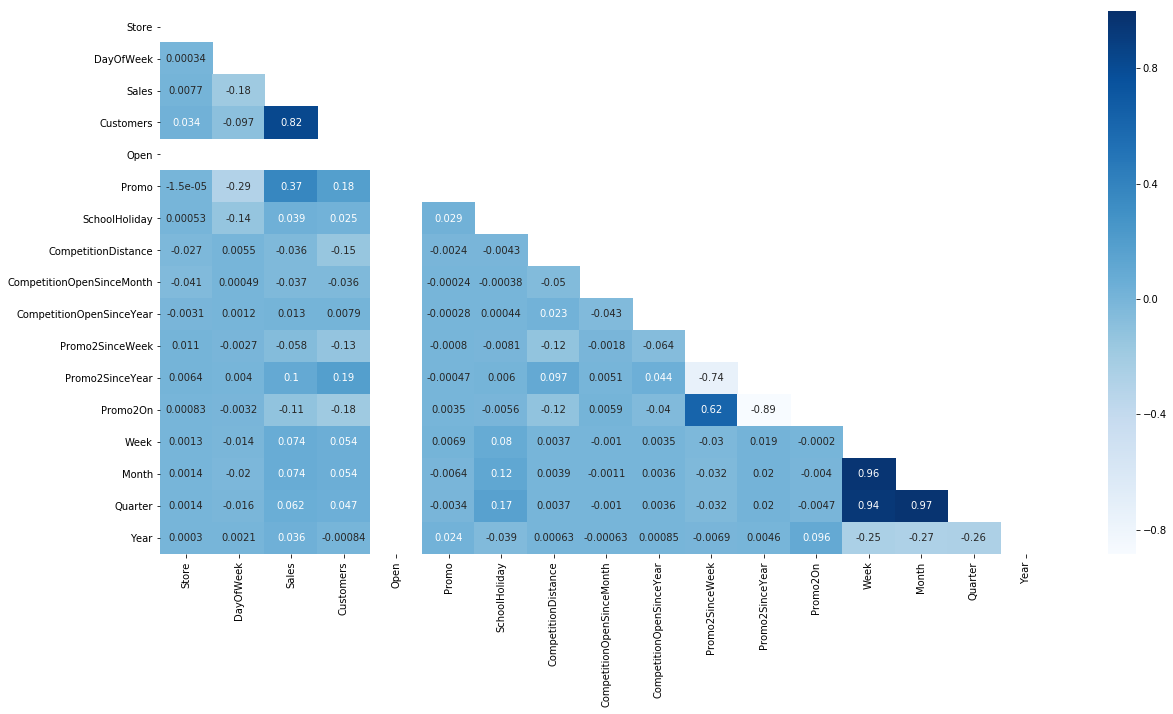

In [33]:
fig, ax = plt.subplots(figsize=(20, 10)) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, ax= ax, annot= True, cmap= "Blues");

It turns out that the variable called Customers has the highest positive correlation with the Sales feature. It might not be very informative since we have to drop this feature in order to predict because test dataset does not contain this feature. The sales of stores will increase as the number of customers increase. It also turns out that two features, which are open and promo, have strong relationships. Dayofweek shows a negative correlation between sales. Based on the observation in the first notebook, it appears that daysofweek 7 indicates Sundays, but most of stores closed on day 7. 

### Customers and Sales

Although the feature customers is not used when we predict the test dataset, it is important to check the relationship between the sales and customers. Based on the heatmap above, customers and sales have the highest positive correlation. This manes that the number of customers is one of the most important variables in order to predict the sales.

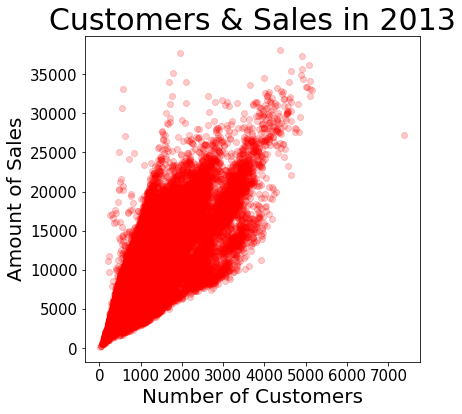

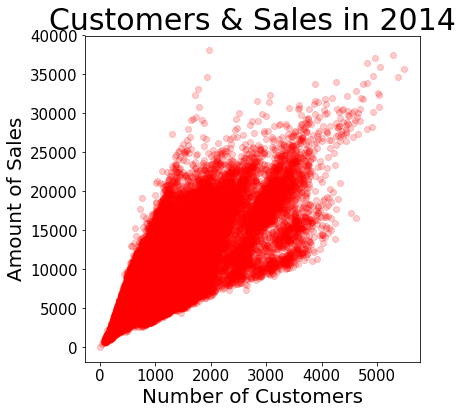

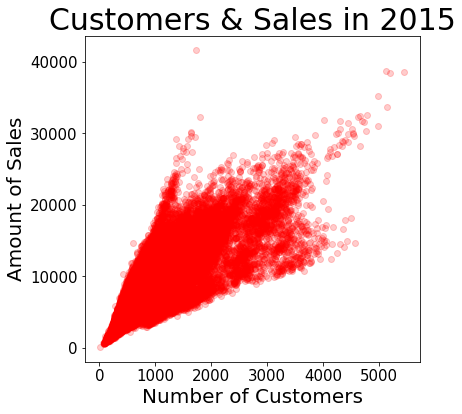

In [213]:
for year in ['2013', '2014', '2015']:
    plt.figure(figsize= (6, 6))
    plt.title('Customers & Sales in ' + year , fontsize= 30)
    plt.scatter(df[year]['Customers'], df[year]['Sales'], color= 'r',alpha= 0.2)
    plt.xticks(fontsize= 15)
    plt.xlabel('Number of Customers', fontsize= 20)
    plt.yticks(fontsize= 15)
    plt.ylabel('Amount of Sales', fontsize= 20);

### Sales based on Month

Customers might spend more money to purchase items on a certain month. In order to check a trend, we can check the total sales. 

In [34]:
avg_sales = pd.DataFrame(df.groupby(['Year', 'Month']).mean()['Sales'])
avg_sales.reset_index(inplace= True)

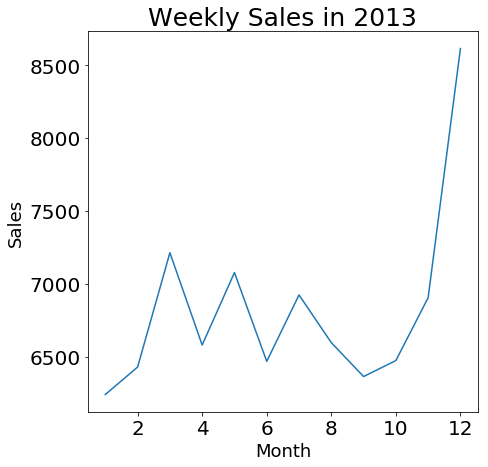

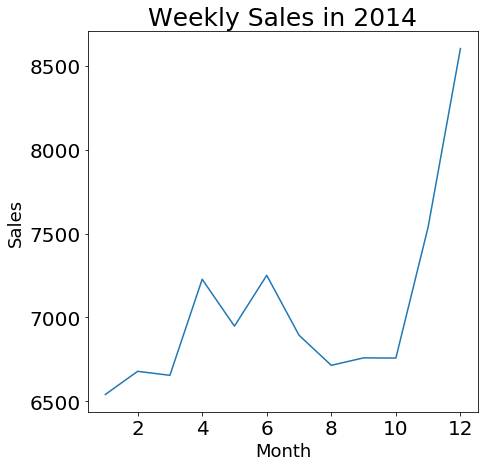

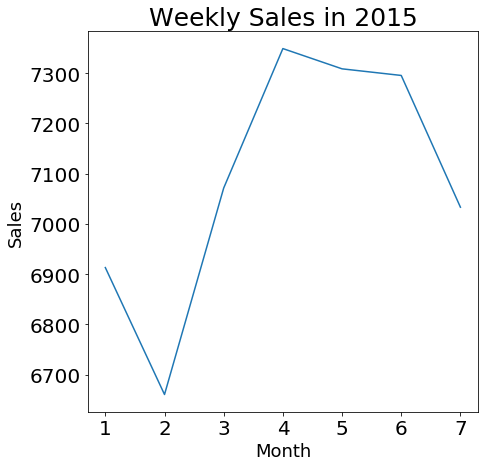

In [212]:
for year in [2013, 2014, 2015]:
    plt.figure(figsize= (7, 7))
    sns.lineplot(x= 'Month', 
                 y= 'Sales', 
                 data= avg_sales[avg_sales.Year == year])
    plt.title('Monthly Sales in ' + str(year), fontsize= 25)
    plt.xticks(fontsize= 20)
    plt.xlabel('Month',fontsize= 18)
    plt.yticks(fontsize= 20)
    plt.ylabel('Sales',fontsize= 18)
    plt.savefig('../images/monthly_sales_in_' + str(year));

As can be seen, sales in these three years have trends. In general, there is an increase from February to March. Based on research, many schools have winter during that time period. This increase might be possibly caused from students who purchase their school items. There is a fluctuation throughout the years and the total sales increase dramatically at the end of the years. This might be possible because customers want to purchase presents for holiday seasons including Christmas and New Year. 

#### Holidays Sales

###### School Holidays Sales

In order to find out if school holidays are important with regards to the total sales, we need to run a test. In order to run the test, we need to find out if the means of the two groups are actually different. 

$H_0$: The mean of total sales in school holiday is the same as the total sales in school days

$H_a$: The mean of these two groups are different.

In [36]:
stat.ttest_ind(df[df.SchoolHoliday == 1]['Sales'], df[df.SchoolHoliday == 0]['Sales'], equal_var= False)

Ttest_indResult(statistic=34.889786293400654, pvalue=4.8716676874566964e-266)

It turns out that the p-value is smaller than 0.05, which means that we reject the null hypothesis. Therfore, we can conclude that the means of the two groups are actually different. 

###### State Holidays Sales

This process will be basically same as school holiday. Instead, there are more groups in state holidays, which are a, b, and c. A indicates public holidays, b indicates Easters, and c indicates Christmas. We can compare the effect of holidays in terms of the total sales. 

$H_0$: The mean of the total sales in non-holidays are same as the holidays' total sales.

$H_a$: The mean of the total sales in non-holidays are different from the holidays' total sales.

In [37]:
stat.ttest_ind(df[df.StateHoliday == 'NoHoliday']['Sales'], df[df.StateHoliday != 'NoHoliday']['Sales'], equal_var= False)

Ttest_indResult(statistic=-9.20074371914482, pvalue=2.376164971399606e-19)

In this case, the p-value is also smaller than 0.05, therefore, we reject the null hypothesis and conclude that the mean of these two groups are different.  

###### Day of Weeks

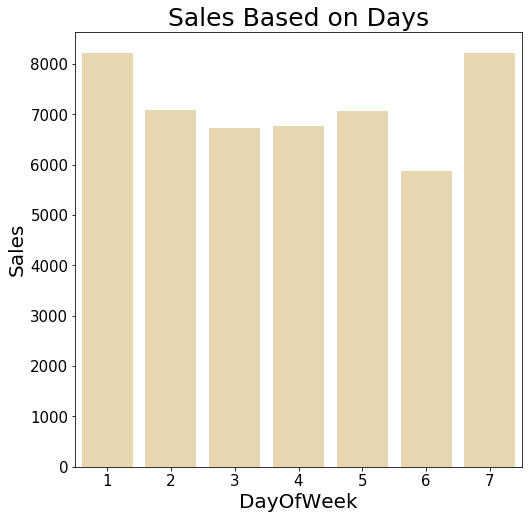

In [211]:
plt.figure(figsize= (8, 8))
plt.title('Sales Based on Days', fontsize= 25)
plt.xlabel('Day of Week', fontsize= 20)
plt.ylabel('Sales', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
sns.barplot(x= df.groupby('DayOfWeek').mean().index,
            y= df.groupby('DayOfWeek').mean()['Sales'],
            color= 'r', alpha= 0.4)
plt.savefig('../images/day_sales.png');

### Promo

Based on the dataset, there are two types of promotions, which are promo and promo2. The feature promo is nation-wide promotion, so all the stores participate. For promo2, some stores participate, while others do not. This might be because some stores are closer to their competitors or the sales are usually low. 

###### Promo

In [38]:
avg_promo_sales = pd.DataFrame(df.groupby('Promo').mean())

In [39]:
avg_promo_sales.reset_index(inplace= True)

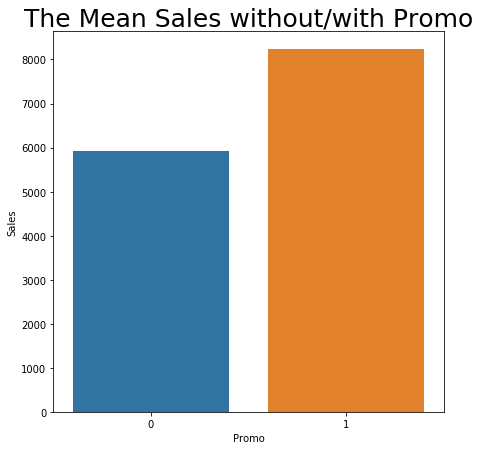

In [40]:
plt.figure(figsize= (7, 7))
sns.barplot(x= 'Promo',
            y= 'Sales',
            data= avg_promo_sales)
plt.title('The Mean Sales without/with Promo', fontsize= 25);

It looks like they have different means, but we need to check if the means are actually different using t-test.

In [41]:
stat.ttest_ind(df[df.Promo == 0]['Sales'],
               df[df.Promo == 1]['Sales'],
              equal_var= False)

Ttest_indResult(statistic=-356.6859122343584, pvalue=0.0)

It turns out that the p-value is close to 0. Therefore, we can conclude that two groups have different means, which is an indicator that the feature Promo might be an important variable. 

###### Promo2

As described earlier, promo2 happens based on stores' situations. Some stores might have lower returns compared to other stores or they are closer to their competitors. First, let's explore the distance between the stores and competitors. 

###### Distance

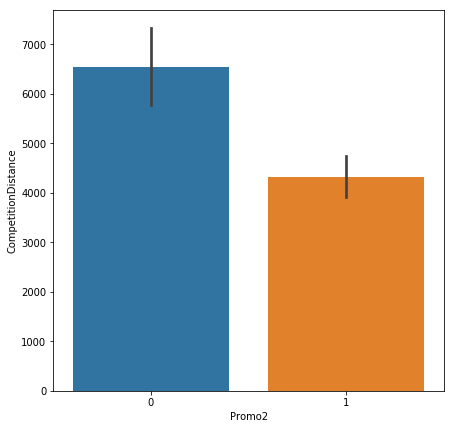

In [42]:
plt.figure(figsize= (7, 7))
sns.barplot(x= 'Promo2', 
            y= 'CompetitionDistance',
            data= store);

For the same reason as promo, we need to run a statistical test in order to distinguish if the means are acutually different.

In [43]:
stat.ttest_ind(store[store.Promo2 == 1]['CompetitionDistance'],
               store[store.Promo2 == 0]['CompetitionDistance'],
               equal_var= False)

Ttest_indResult(statistic=-4.832687229322783, pvalue=1.5965397062331203e-06)

Based on the test above, the means between the two groups are different. Therefore, promo2 is statistically significant with regrads to competition distance. 

Now, let's take a look if promo2 actually has an effect on increasing stores sales. In order to do this, we can look at few stores for examples.

In order to check the difference in terms of the total sales, we can check stores where they start promo2 after data gathering. The datset starst from January 1st, 2013 to July 31st, 2015. Therefore, we can take a look at the stores with promo2 starts in 2014 and after 2014. 

###### Store Sales

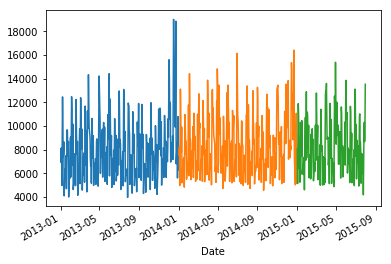

In [162]:
df[df.Store== 536].groupby('Year')['Sales'].plot();

The store 536, store type a, started promo2 in May 2013. There seemed to be a slight increase in therm of the sales.

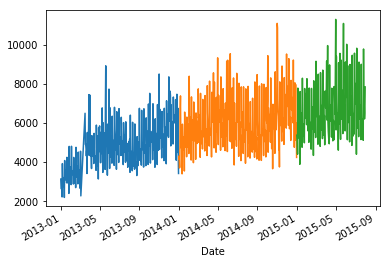

In [164]:
df[df.Store== 353].groupby('Year')['Sales'].plot();

The store 353, store type b, started promo2 in May 2013. Before the promo2, the store's sales ranged from 2000 to 4000. After the promo2, the store tended to increase the total sales througout the years.

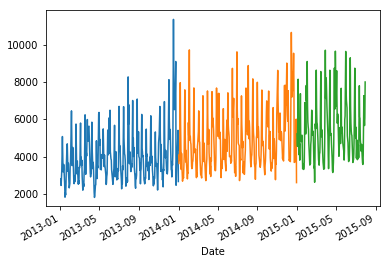

In [166]:
df[df.Store== 1105].groupby('Year')['Sales'].plot();

The store 1105, store type c, started promo2 in May 2013. After the store decided to participate the total sales of the store tended to increase.

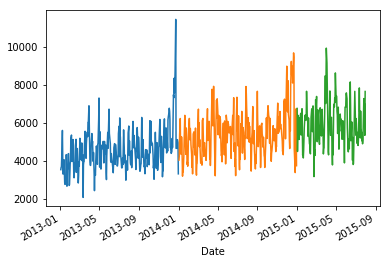

In [165]:
df[df.Store== 1083].groupby('Year')['Sales'].plot();

In terms of the store type d, the store 1083 seemed to be a small increase in terms of the total sales.

###### Promo2 Months

Based on promo2, different stores start their promo2 on different months. 

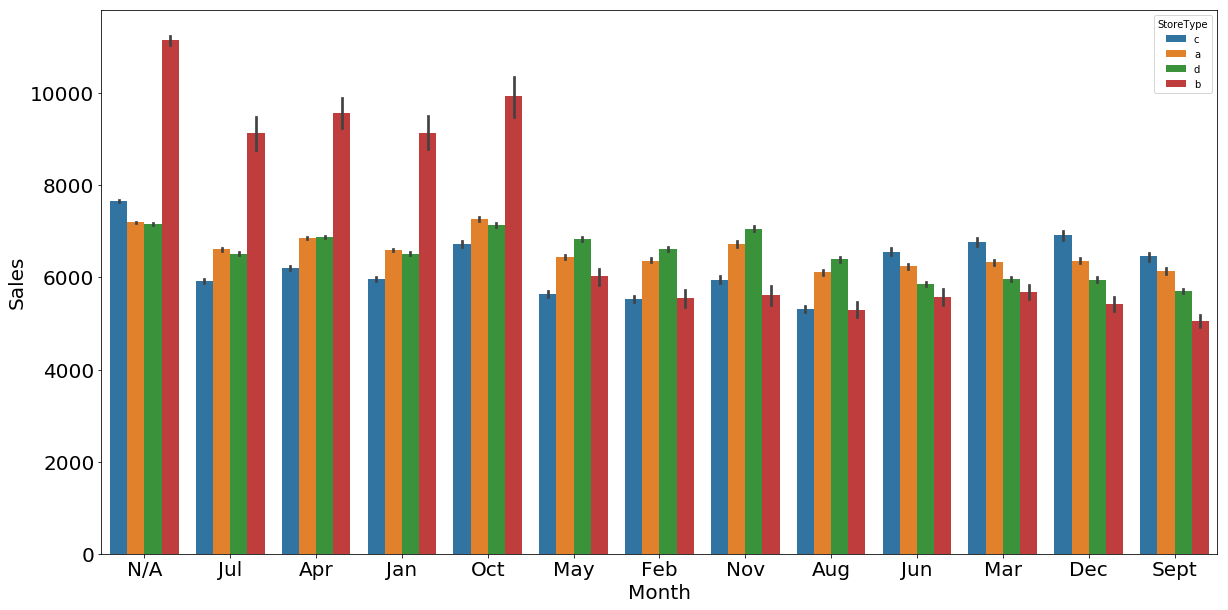

In [209]:
plt.figure(figsize= (20, 10))
sns.barplot(x= 'Promo2BeginMonth',
            y= 'Sales',
            data= df,
            hue= 'StoreType')
plt.xticks(fontsize= 20)
plt.xlabel('Month', fontsize= 20)
plt.yticks(fontsize= 20)
plt.ylabel('Sales', fontsize= 20)
plt.savefig('../images/promo2month.png');

As can be seen, stores where they start their promo2 in October  have good sales compared to others. It turns out that store type b performs well with regrads to promo2 in January, July, April, and October, while store type c does well in March, Jun, September, and December. Store types are important, but also the time frame is also important with regrads to promo2. 